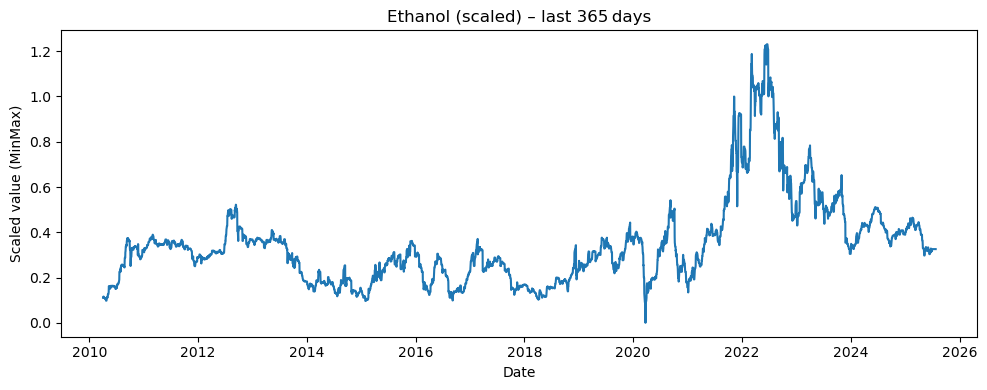

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pk 
import pathlib as pl
import numpy as np

# Load the scaled calendar file
df = pd.read_parquet("C:/Users/felix/OneDrive/Desktop/Projects/GitHub/Multiband Ethanol Forecasting/processed_data/calendar_scaled.parquet")  # adjust path if needed

# Plot the last 365 days of the ethanol_scaled series
last_year = df.tail(10000)

plt.figure(figsize=(10, 4))
plt.plot(last_year["date"], last_year["ethanol_scaled"])
plt.title("Ethanol (scaled) – last 365 days")
plt.xlabel("Date")
plt.ylabel("Scaled value (MinMax)")
plt.tight_layout()
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5593 entries, 0 to 5592
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         5593 non-null   datetime64[ns]
 1   market_closed                5593 non-null   int32         
 2   event_xmas_newyear           5593 non-null   int32         
 3   event_driving_season         5593 non-null   int32         
 4   event_corn_harvest           5593 non-null   int32         
 5   event_easter                 5593 non-null   int32         
 6   ethanol_scaled               5593 non-null   float64       
 7   ethanol_volume_scaled        5593 non-null   float64       
 8   corn_scaled                  5593 non-null   float64       
 9   fx_scaled                    5593 non-null   float64       
 10  brent_scaled                 5593 non-null   float64       
 11  ppi_scaled                   5593 non-null 

In [5]:
df.head()

,date,market_closed,event_xmas_newyear,event_driving_season,event_corn_harvest,event_easter,ethanol_scaled,ethanol_volume_scaled,corn_scaled,fx_scaled,...,brent_lag_30_scaled,brent_log_ret_1_scaled,fx_lag_7_scaled,fx_lag_30_scaled,fx_log_ret_1_scaled,ethanol_roll_mean_28_scaled,ethanol_roll_std_28_scaled,ethanol_z_90_scaled,corn_ethanol_spread_scaled,brent_ethanol_spread_scaled
0,2010-04-03,1,0,0,0,0,0.110682,0.000000,0.061699,0.052026,...,0.288510,0.431241,0.064354,0.057500,0.458097,0.020741,0.071008,0.392955,0.401962,0.391058
1,2010-04-04,1,0,0,0,0,0.110682,0.000000,0.061699,0.052026,...,0.292135,0.431241,0.064354,0.055177,0.458097,0.019020,0.063194,0.396401,0.401962,0.391058
2,2010-04-05,0,0,0,0,0,0.110682,0.000000,0.064072,0.051313,...,0.292135,0.533297,0.059018,0.055177,0.444549,0.016991,0.046233,0.399702,0.405554,0.419741
3,2010-04-06,0,0,0,0,0,0.115830,0.040404,0.065496,0.049772,...,0.292135,0.447063,0.057707,0.055177,0.428733,0.015822,0.036348,0.409558,0.398658,0.420011
4,2010-04-07,0,0,0,0,0,0.115830,0.000000,0.084480,0.055591,...,0.300471,0.453828,0.056534,0.057316,0.568397,0.015330,0.034532,0.412360,0.427132,0.426610


In [6]:
df.describe()

,date,market_closed,event_xmas_newyear,event_driving_season,event_corn_harvest,event_easter,ethanol_scaled,ethanol_volume_scaled,corn_scaled,fx_scaled,...,brent_lag_30_scaled,brent_log_ret_1_scaled,fx_lag_7_scaled,fx_lag_30_scaled,fx_log_ret_1_scaled,ethanol_roll_mean_28_scaled,ethanol_roll_std_28_scaled,ethanol_z_90_scaled,corn_ethanol_spread_scaled,brent_ethanol_spread_scaled
count,5593,5593.000000,5593.000000,5593.000000,5593.000000,5593.0,5593.000000,5593.000000,5593.000000,5593.000000,...,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000
mean,2017-11-28 00:00:00,0.313427,0.026819,0.088682,0.080458,0.0,0.345230,0.104972,0.327628,0.493261,...,0.240061,0.430765,0.492203,0.488718,0.459654,0.320288,0.150223,0.537887,0.406226,0.239348
min,2010-04-03 00:00:00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.015452
25%,2014-01-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.0,0.216216,0.016162,0.119127,0.166498,...,0.061979,0.411235,0.166176,0.164152,0.438033,0.143649,0.061345,0.432345,0.250783,0.046166
50%,2017-11-28 00:00:00,0.000000,0.000000,0.000000,0.000000,0.0,0.315315,0.067340,0.234931,0.496389,...,0.129395,0.431241,0.493652,0.484107,0.458097,0.278575,0.106955,0.535729,0.346252,0.105414
75%,2021-09-26 00:00:00,1.000000,0.000000,0.000000,0.000000,0.0,0.394681,0.149495,0.535358,0.819196,...,0.408844,0.447908,0.818299,0.813653,0.481137,0.386263,0.173505,0.641278,0.533683,0.439313
max,2025-07-25 00:00:00,1.000000,1.000000,1.000000,1.000000,0.0,1.230840,1.000000,1.000000,1.092921,...,1.000000,1.000000,1.092921,1.092921,1.000000,1.462606,1.364185,1.000000,1.000000,1.000000
std,NaN,0.463928,0.161569,0.284310,0.272025,0.0,0.194135,0.122277,0.250502,0.319927,...,0.236408,0.058146,0.319967,0.320082,0.062904,0.256985,0.153074,0.134235,0.214369,0.254608


In [32]:
train_mask = df["date"] < "2022-01-01"
scaled_cols = [c for c in df.columns if c.endswith("_scaled")]
stats_train = df.loc[train_mask, scaled_cols].agg(["min", "max"]).transpose()
print(stats_train.head())
print("Training slice in [0, 1]")

                       min  max
ethanol_scaled         0.0  1.0
ethanol_volume_scaled  0.0  1.0
corn_scaled            0.0  1.0
fx_scaled              0.0  1.0
brent_scaled           0.0  1.0
Training slice in [0, 1]


In [33]:
df["weekday"] = pd.to_datetime(df["date"]).dt.dayofweek  # Monday=0, Sunday=6
# Check distribution of weekdays when market_closed == 1
closed_weekdays = df[df["market_closed"] == 1]["weekday"].value_counts().sort_index()
print("Market closed per weekday (0=Mon, ..., 6=Sun):")
print(closed_weekdays)

Market closed per weekday (0=Mon, ..., 6=Sun):
weekday
0     81
1      9
2     12
3     25
4     28
5    799
6    799
Name: count, dtype: int64


In [35]:
df[df["weekday"] == 0][["date", "market_closed", 
                        "ethanol_scaled", "corn_scaled", 
                        "brent_scaled"]].query("market_closed == 1").head(10)



,date,market_closed,ethanol_scaled,corn_scaled,brent_scaled
58,2010-05-31,1,0.162162,0.089226,0.313519
93,2010-07-05,1,0.153417,0.137636,0.284523
156,2010-09-06,1,0.338247,0.289511,0.315694
289,2011-01-17,1,0.328732,0.639298,0.641174
324,2011-02-21,1,0.377091,0.775036,0.802102
422,2011-05-30,1,0.368082,0.847651,0.878942
457,2011-07-04,1,0.329717,0.540579,0.924248
520,2011-09-05,1,0.350416,0.850498,0.649511
632,2011-12-26,1,0.271045,0.583768,0.734324
639,2012-01-02,1,0.289575,0.635026,0.729250


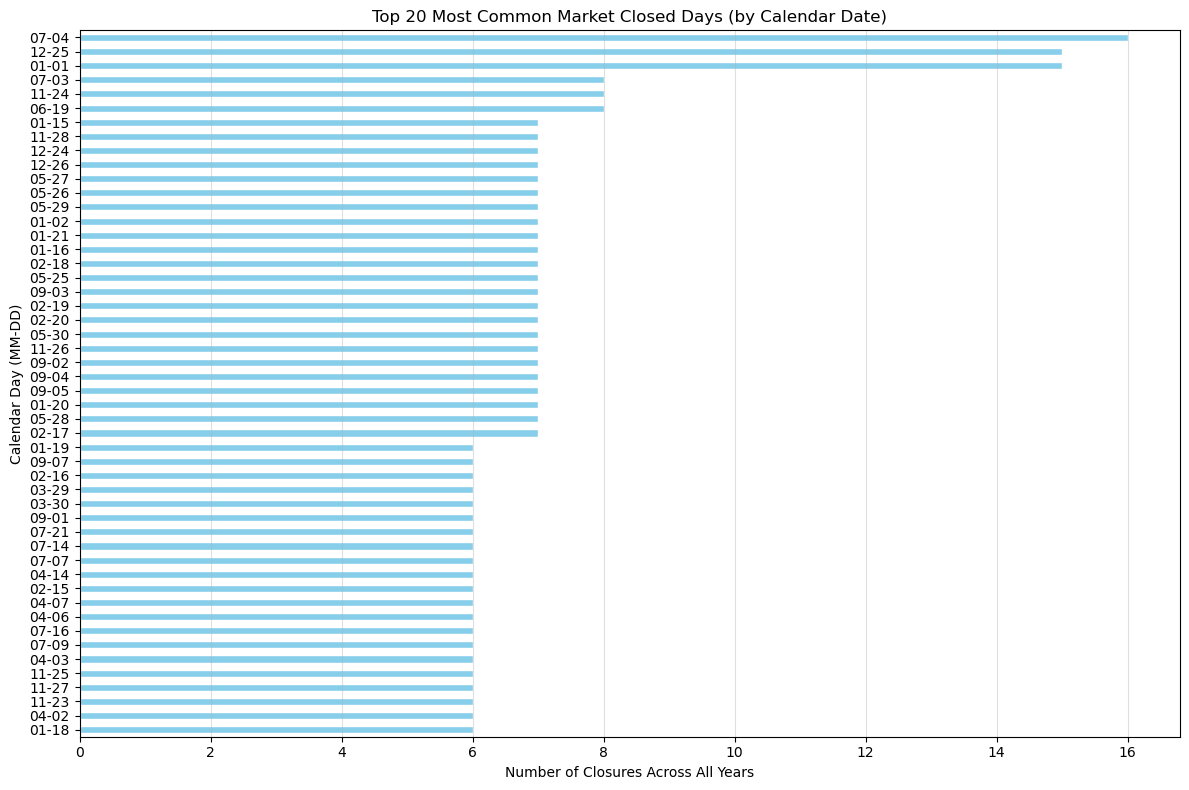

In [46]:
# Ensure 'date' is datetime
df["date"] = pd.to_datetime(df["date"])

# Filter only market closed days
closed = df[df["market_closed"] == 1].copy()

# Extract just month and day
closed["month_day"] = closed["date"].dt.strftime("%m-%d")  # e.g., "12-25"

# Count how many times each month-day occurs
top_closed = closed["month_day"].value_counts().head(50).sort_values(ascending=True)

# Plot
plt.figure(figsize=(12, 8))
top_closed.plot(kind="barh", color="skyblue", edgecolor="white")
plt.title("Top 20 Most Common Market Closed Days (by Calendar Date)")
plt.xlabel("Number of Closures Across All Years")
plt.ylabel("Calendar Day (MM-DD)")
plt.grid(True, axis='x', linestyle='-', alpha=0.4)
plt.tight_layout()
plt.show()

In [48]:
print(f"last_dat: {df['date'].max()}")

last_dat: 2025-07-25 00:00:00


In [47]:
print(f"Total rows: {len(df)}")

Total rows: 5593


In [51]:
full_range = pd.date_range(start="2010-01-01", end="2025-07-25")
actual_dates = pd.to_datetime(df["date"])
missing_dates = full_range.difference(actual_dates)
print(f"Missing days: {len(missing_dates)}")
print(missing_dates)  # preview first few

Missing days: 92
DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14', '2010-01-15', '2010-01-16',
               '2010-01-17', '2010-01-18', '2010-01-19', '2010-01-20',
               '2010-01-21', '2010-01-22', '2010-01-23', '2010-01-24',
               '2010-01-25', '2010-01-26', '2010-01-27', '2010-01-28',
               '2010-01-29', '2010-01-30', '2010-01-31', '2010-02-01',
               '2010-02-02', '2010-02-03', '2010-02-04', '2010-02-05',
               '2010-02-06', '2010-02-07', '2010-02-08', '2010-02-09',
               '2010-02-10', '2010-02-11', '2010-02-12', '2010-02-13',
               '2010-02-14', '2010-02-15', '2010-02-16', '2010-02-17',
               '2010-02-18', '2010-02-19', '2010-02-20', '2010-02-21',
               '2010-02-22', '2010-02-23', '2010-02-24', '20

In [52]:
print(df["date"].min())

2010-04-03 00:00:00


#### Building the Cyclical Calendar DataFrame

In [62]:
from timeseries_datamodule import merge_calendars
from calendar_engineering import build_calendar_df

# Create a full calendar DataFrame
cyclical_calendar = build_calendar_df(start_date="2010-04-03", end_date="2025-07-25")
cyclical_calendar_path = Path("cyclical_calendar.parquet")
cyclical_calendar.to_parquet(cyclical_calendar_path)

print(f"Saved cyclical calendar with shape: {cyclical_calendar.shape}")
cyclical_calendar.head()

Saved cyclical calendar with shape: (5593, 7)


c:\Users\felix\OneDrive\Desktop\Projects\GitHub\Multiband Ethanol Forecasting\src\data\calendar_engineering.py:70: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ], axis=1).fillna(False)


,date,days_sin,days_cos,months_sin,months_cos,week_of_month,is_eom
0,2010-04-03,-0.974928,-0.222521,0.866025,-0.5,1,0
1,2010-04-04,-0.781831,0.623490,0.866025,-0.5,1,0
2,2010-04-05,0.000000,1.000000,0.866025,-0.5,2,0
3,2010-04-06,0.781831,0.623490,0.866025,-0.5,2,0
4,2010-04-07,0.974928,-0.222521,0.866025,-0.5,2,0


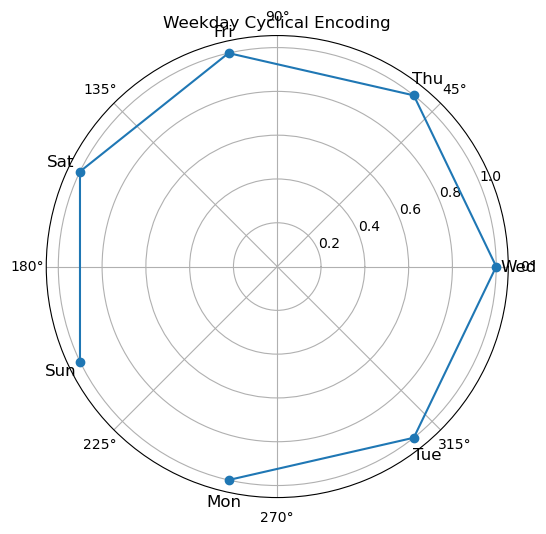

In [86]:
week_sample = cyclical_calendar.head(7)  # Mon-Sun

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

angles = np.arctan2(week_sample["days_sin"], week_sample["days_cos"])
radii = np.sqrt(week_sample["days_sin"]**2 + week_sample["days_cos"]**2)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'}, dpi=100)
ax.plot(angles, radii, 'o-')

# Add labels
for i, label in enumerate(weekdays):
    ax.text(angles[i], 1.1, label, ha='center', va='center', fontsize=12, color='black')

ax.set_title("Weekday Cyclical Encoding")
plt.show()

The points form a smooth circle, meaning sin and cos were computed correctly. There are 7 points, so one for each weekday.
The angle between points is uniform, suggesting proper encoding from 0 (Monday) to 6 (Sunday). FInally, all points lie on the unit circle (radius = 1), confirming that sin² + cos² ≈ 1.

### Merging Calendars 

In [93]:
import os
print(os.getcwd())

c:\Users\felix\OneDrive\Desktop\Projects\GitHub\Multiband Ethanol Forecasting\src\data


In [96]:
from pathlib import Path
from timeseries_datamodule import merge_calendars

scaled_path = Path("../../processed_data/calendar_scaled.parquet")
cyclical_path = Path("../../processed_data/cyclical_calendar.parquet")

merged = merge_calendars(calendar_scaled = scaled_path, cyclical_calendar = cyclical_path,
                         date_column = "date", how = "left")
merged.to_parquet("../../processed_data/calendar_merged.parquet", index=False)

print("Merged shape:", merged.shape)
display(merged.head())

Merged shape: (5593, 35)


,date,market_closed,event_xmas_newyear,event_driving_season,event_corn_harvest,event_easter,ethanol_scaled,ethanol_volume_scaled,corn_scaled,fx_scaled,...,ethanol_roll_std_28_scaled,ethanol_z_90_scaled,corn_ethanol_spread_scaled,brent_ethanol_spread_scaled,days_sin,days_cos,months_sin,months_cos,week_of_month,is_eom
0,2010-04-03,1,0,0,0,0,0.110682,0.000000,0.061699,0.052026,...,0.071008,0.392955,0.401962,0.391058,-0.974928,-0.222521,0.866025,-0.5,1,0
1,2010-04-04,1,0,0,0,0,0.110682,0.000000,0.061699,0.052026,...,0.063194,0.396401,0.401962,0.391058,-0.781831,0.623490,0.866025,-0.5,1,0
2,2010-04-05,0,0,0,0,0,0.110682,0.000000,0.064072,0.051313,...,0.046233,0.399702,0.405554,0.419741,0.000000,1.000000,0.866025,-0.5,2,0
3,2010-04-06,0,0,0,0,0,0.115830,0.040404,0.065496,0.049772,...,0.036348,0.409558,0.398658,0.420011,0.781831,0.623490,0.866025,-0.5,2,0
4,2010-04-07,0,0,0,0,0,0.115830,0.000000,0.084480,0.055591,...,0.034532,0.412360,0.427132,0.426610,0.974928,-0.222521,0.866025,-0.5,2,0


In [97]:
print(merged[["days_sin","days_cos","months_sin","months_cos","week_of_month","is_eom"]]
        .isna().sum())

days_sin         0
days_cos         0
months_sin       0
months_cos       0
week_of_month    0
is_eom           0
dtype: int64


In [98]:
print(merged["week_of_month"].value_counts().sort_index())
print(merged["is_eom"].value_counts())

week_of_month
1     727
2    1288
3    1288
4    1286
5     946
6      58
Name: count, dtype: int64
is_eom
0    5044
1     549
Name: count, dtype: int64


C:\Users\felix\AppData\Local\Temp\ipykernel_9296\3416315414.py:2: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  sample = merged.set_index("date").last("60D")  # last 60 calendar days


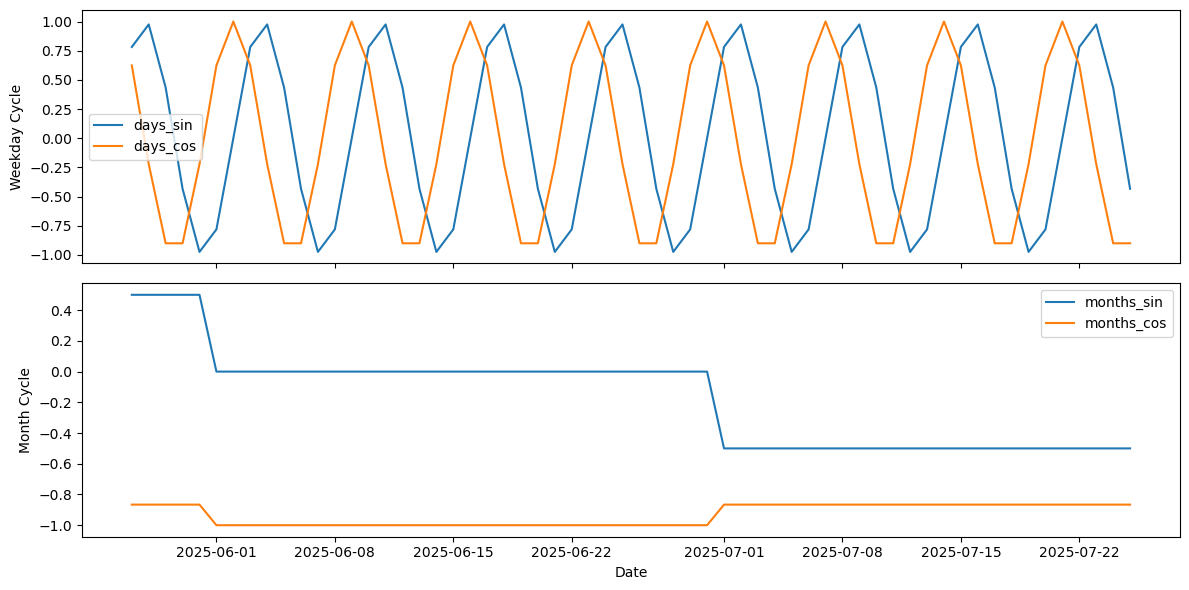

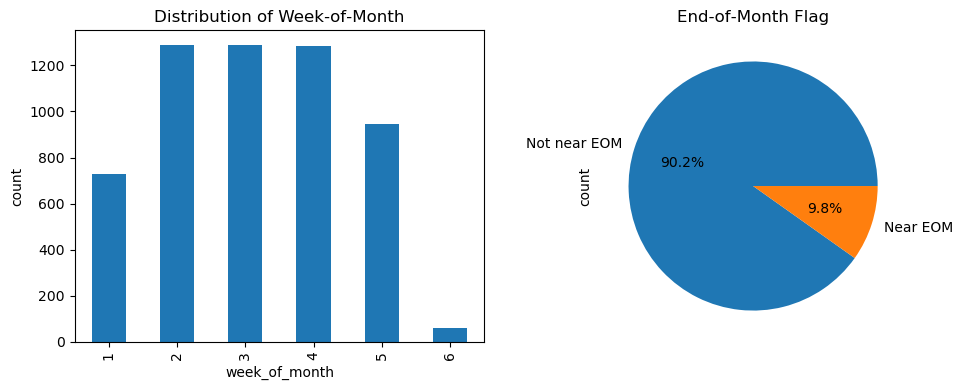

In [ ]:
# 1) Time series of the cyclical features over a sample window
sample = merged.set_index("date").last("60D")  # last 60 calendar days
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
axes[0].plot(sample.index, sample["days_sin"], label="days_sin")
axes[0].plot(sample.index, sample["days_cos"], label="days_cos")
axes[0].set_ylabel("Weekday Cycle")
axes[0].legend()

axes[1].plot(sample.index, sample["months_sin"], label="months_sin")
axes[1].plot(sample.index, sample["months_cos"], label="months_cos")
axes[1].set_ylabel("Month Cycle")
axes[1].legend()

plt.xlabel("Date")
plt.tight_layout()
plt.show()


# 2) Histogram of week_of_month / is_eom
fig, axes = plt.subplots(1, 2, figsize=(10,4))
merged["week_of_month"].value_counts().sort_index().plot.bar(ax=axes[0])
axes[0].set_title("Distribution of Week‑of‑Month")
axes[0].set_xlabel("week_of_month"); axes[0].set_ylabel("count")

merged["is_eom"].value_counts().plot.pie(labels=["Not near EOM","Near EOM"], autopct="%1.1f%%", ax=axes[1])
axes[1].set_title("End‑of‑Month Flag")

plt.tight_layout()
plt.show()

In [104]:
from torch.utils.data import DataLoader
from timeseries_datamodule import RollingOrigin

target_variable = "ethanol_scaled" 
# 1. pick your feature columns: 
feature_cols = [c for c in merged.columns 
                if c not in ("date", target_variable)]

ds = RollingOrigin(merged, features=feature_cols)
loader = DataLoader(ds, batch_size=64, shuffle=False, drop_last=True)

# 2. grab one batch to sanity‑check shapes:
lookback, daily_window, daily_tgt, weekly_tgt, monthly_tgt = next(iter(loader))
print(lookback.shape, daily_window.shape, daily_tgt.shape, weekly_tgt.shape, monthly_tgt.shape)
# expect: (B, 365, F), (B, 14, F)

torch.Size([64, 365, 33]) torch.Size([64, 14, 33]) torch.Size([64]) torch.Size([64, 7]) torch.Size([64, 30])


### Training the model 



In [14]:
import sys
from pathlib import Path 
import os
import pandas as pd
import torch

# Use the absolute path to your project
project_path = r"C:\Users\felix\OneDrive\Desktop\Projects\GitHub\Multiband Ethanol Forecasting"
os.chdir(project_path)
sys.path.append(project_path)

# Now just import normally
from src.models.model import HierForecastNet
from src.train.train import HierarchicalTrainer, TrainingConfig
from timeseries_datamodule import build_loaders

# Load data - simple relative path
merged_calendars = pd.read_parquet("processed_data/calendar_merged.parquet")

target_variable = "ethanol_scaled" 
feature_cols = [c for c in merged_calendars.columns if c not in ("date", target_variable)]

# Debug: Check the actual number of features
print(f"Number of feature columns: {len(feature_cols)}")
print(f"Feature columns: {feature_cols}")

# Building datasets & loaders
train_loader, valid_loader, _= build_loaders(merged_calendars, batch_size=64)

# Debug: Check what the data loader actually returns
sample_batch = next(iter(train_loader))
lookback, daily_window, daily_tgt, weekly_tgt, monthly_tgt = sample_batch
print(f"Lookback shape: {lookback.shape}")
print(f"Daily window shape: {daily_window.shape}")
print(f"Actual input features from data: {daily_window.shape[-1]}")

# Model initialization - USE THE CORRECT NUMBER OF FEATURES
actual_input_features = daily_window.shape[-1]
device = torch.device("cpu")
model = HierForecastNet(
    input_features=actual_input_features,  # Use actual feature count
    hidden_dim=128, 
    dropout_rate=0.2
).to(device)

print(f"Model initialized with {actual_input_features} input features")

# Configuring and launching training
cfg = TrainingConfig(
    batch_size=64, 
    epochs=10,
    learning_rate=0.01,
    device=device.type,
    verbose=True,
    weight_decay=1e-5,
    daily_weight=0.1,
    weekly_weight=0.3,
    monthly_weight=0.6,
    lambda_wrmsse=0.2
)

# Training   
trainer = HierarchicalTrainer(cfg, train_loader, model=model)
trainer.fit(val_loader=valid_loader)

Number of feature columns: 33
Feature columns: ['market_closed', 'event_xmas_newyear', 'event_driving_season', 'event_corn_harvest', 'event_easter', 'ethanol_volume_scaled', 'corn_scaled', 'fx_scaled', 'brent_scaled', 'ppi_scaled', 'ethanol_lag_7_scaled', 'ethanol_lag_30_scaled', 'ethanol_log_ret_1_scaled', 'corn_lag_7_scaled', 'corn_lag_30_scaled', 'corn_log_ret_1_scaled', 'brent_lag_7_scaled', 'brent_lag_30_scaled', 'brent_log_ret_1_scaled', 'fx_lag_7_scaled', 'fx_lag_30_scaled', 'fx_log_ret_1_scaled', 'ethanol_roll_mean_28_scaled', 'ethanol_roll_std_28_scaled', 'ethanol_z_90_scaled', 'corn_ethanol_spread_scaled', 'brent_ethanol_spread_scaled', 'days_sin', 'days_cos', 'months_sin', 'months_cos', 'week_of_month', 'is_eom']
Lookback shape: torch.Size([64, 365, 34])
Daily window shape: torch.Size([64, 14, 34])
Actual input features from data: 34
Model initialized with 34 input features


Epoch 1/10:   0%|          | 0/60 [00:00<?, ?it/s]

RuntimeError: input.size(-1) must be equal to input_size. Expected 128, got 34